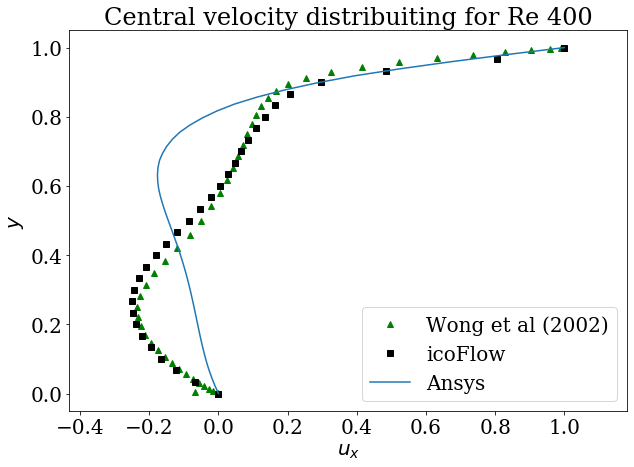

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pl
import matplotlib as mtp
from scipy.interpolate import UnivariateSpline as unis

mtp.rcParams['font.family'] = 'DejaVu Serif'
mtp.rcParams['font.size'] = 20

velU = pd.read_csv('./velU.csv',header = 0)
velU0 = pd.read_csv('./velU0.csv',header = 0)
velY = pd.read_csv('./velY.csv',header = 0)
velY0 = pd.read_csv('./velY0.csv',header = 0)
vel_Ku = pd.read_csv('./ku1987.csv',header = None)
vel_Ku = np.asarray(vel_Ku).T

vel_ansys = pd.read_csv('./ruhan_aquecidinho.csv',skiprows = 5,header = 0)
vel2_ansys = pd.read_csv('./ruhan_aquecidinho2.csv',skiprows = 5,header = 0)
vAnsys_U = vel_ansys['VelocityU']
vAnsys_V = vel2_ansys['VelocityV']
vAnsys_W = vel2_ansys['VelocityW']
TAnsys = np.asarray(vel2_ansys['T'] + 273.15)

vAnsys_U = vAnsys_U/max(vAnsys_U)
vAnsys_V = vAnsys_V/max(vAnsys_V)
vAnsys_W = vAnsys_W/max(vAnsys_W)

y_Ansys = vel_ansys['Y']
x_Ansys = vel2_ansys['X']

y_W = np.array((1.00,0.9991,0.9965,0.9922,0.9861,0.9783,0.9688,0.9575,0.9444,0.9297,
                0.9132,0.8950,0.8750,0.8533,0.8299,0.8047,0.7778,0.7491,0.7188,0.6866,
                0.6528,0.6172,0.5799,0.5408,0.5,0.4592,0.4201,0.3828,0.3472,0.3134,0.2812,
                0.2509,0.2222,0.1953,0.1701,0.1467,0.1250,0.1050,0.0868,0.0703,0.0556,0.0425,
                0.0312,0.0217,0.0139,0.0078,0.0035,0.0009,0.0000))
ux_W = np.array((1.0,0.9893,0.9570,0.9032,0.8286,0.7358,0.6304,0.5207,0.4162,0.3256,0.2540,
                 0.2019,0.1663,0.1419,0.1242,0.1097,0.0965,0.0836,0.0704,0.0564,0.0411,
                 0.0238,0.0036,-0.0206,-0.05,-0.0836,-0.1190,-0.1540,-0.1856,-0.2108,-0.2275,
                 -0.2349,-0.2336,-0.2250,-0.2111,-0.1937,-0.1744,-0.1541,-0.1337,-0.1134,-0.0935,
                 -0.0745,-0.0568,-0.0407,-0.0268,-0.0154,-0.0690,-0.0018,0.0))
ux = np.asarray(velU['U:0'])
ux[-1] = 0
ux = ux/max(ux)
y = np.asarray(velU['Points:1'])

ux_0 = np.asarray(velU0['U:0'])
ux_0[-1] = 0
ux_0 = ux_0/max(ux_0)
y_0 = np.asarray(velU0['Points:1'])

Ty = np.asarray(velY['T'])
x_T = np.asarray(velY['Points:0'])

pl.figure(figsize = (10,7))
pl.title('Central velocity distribuiting for Re 400')
pl.plot(ux_W,y_W,'g^',label = 'Wong et al (2002)')
#pl.plot(vel_Ku[0],vel_Ku[1],'ro', label = 'Ku at al (1987)')
pl.plot(ux[::-1],y,'ks',label = 'icoFlow')
pl.plot(vAnsys_U,y_Ansys,label = 'Ansys')
#pl.plot(ux,y,'bs',label = 'icoFlow')
#pl.plot(ux_0[::-1],y_0,'ms',label = 'ant')
#pl.plot(ux_0,y_0,'ms',label = 'ant')
pl.xlabel('$u_x$')
pl.ylabel('$y$')
pl.legend(loc = 'best')
pl.axis('equal')
pl.savefig('Validation_Re400.pdf')
pl.savefig('Validation_Re400.png')
pl.show()

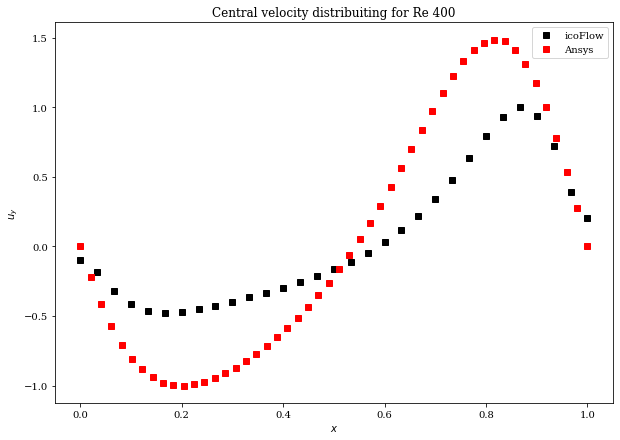

In [2]:
uy = np.asarray(velY['U:1'])
uy = uy/max(abs(uy))
x = np.asarray(velY['Points:0'])

uy_0 = np.asarray(velY0['U:1'])
uy_0 = uy_0/max(abs(uy_0))
x_0 = np.asarray(velY0['Points:0'])


pl.figure(figsize = (10,7))
pl.title('Central velocity distribuiting for Re 400')
pl.plot(x,uy,'ks',label = 'icoFlow')
pl.plot(x_Ansys,-vAnsys_V,'rs',label = 'Ansys')
pl.ylabel('$u_y$')
pl.xlabel('$x$')
pl.legend(loc = 'best')
pl.savefig('ValidationY_Re400.pdf')
pl.show()

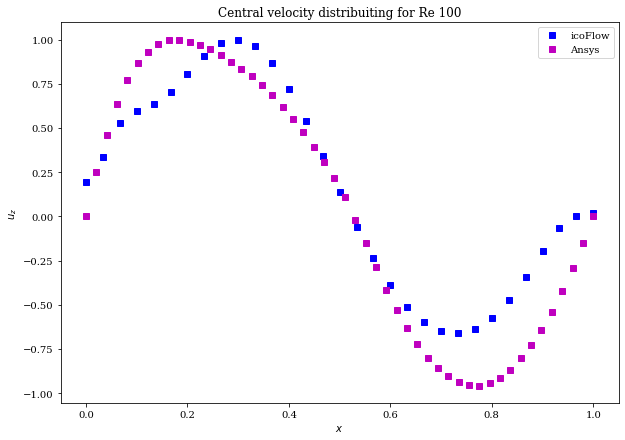

In [3]:
uz = np.asarray(velY['U:2'])
uz = uz/max(abs(uz))
x = np.asarray(velY['Points:0'])

uz_0 = np.asarray(velY0['U:2'])
uz_0 = uz_0/max(abs(uz_0))
x_0 = np.asarray(velY0['Points:0'])


pl.figure(figsize = (10,7))
pl.title('Central velocity distribuiting for Re 100')
pl.plot(x,uz,'bs',label = 'icoFlow')
pl.plot(x_Ansys,vAnsys_W,'ms',label = 'Ansys')
pl.ylabel('$u_z$')
pl.xlabel('$x$')
pl.legend(loc = 'best')
pl.savefig('ValidationZ_Re400.pdf')
pl.show()

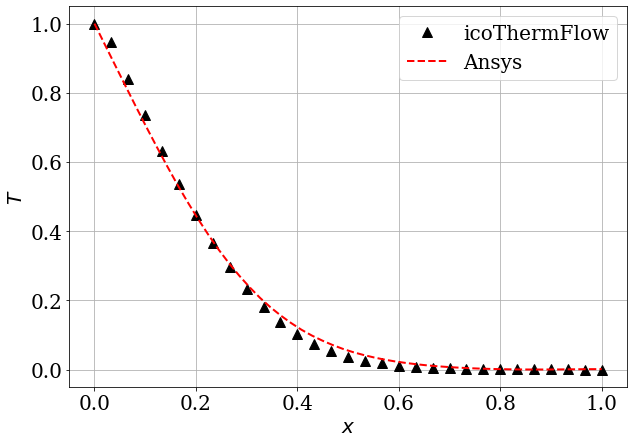

In [5]:
pl.figure(figsize = (10,7))
#pl.title('Central Temperature distribuiting for Re 400')
pl.plot(x_T,(Ty - np.min(Ty))/(np.max(Ty) - np.min(Ty)),'k^',label = 'icoThermFlow',ms = 10)
pl.plot(x_Ansys,(TAnsys - np.min(TAnsys))/(np.max(TAnsys) - np.min(TAnsys)),'r--',label = 'Ansys',lw = 2)
pl.xlabel('$x$')
pl.ylabel('$T$')
pl.legend(loc = 'best')
pl.grid(True)
pl.savefig('Temp_Re400.pdf', bbox_inches = 'tight')
pl.show()

In [5]:
func2 = unis(x_Ansys,TAnsys)(x_T)
num = (Ty - np.min(Ty))/(np.max(Ty) - np.min(Ty))
ansys = (func2 - np.min(func2))/(np.max(func2) - np.min(func2))
erro = num - ansys
np.linalg.norm(erro)/np.linalg.norm(ansys)

0.07200186743370073